# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [140]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

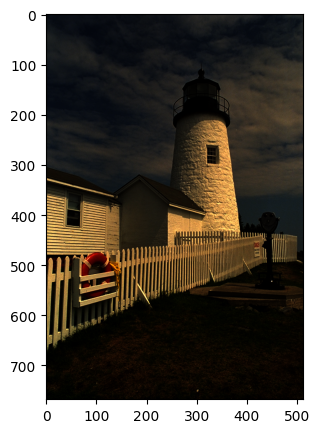

In [141]:
IMG_PATH = '../data/dark.png'
# IMG_PATH = '../data/kodim05.jpg'
# IMG_PATH = '../data/sea.jpg'
# IMG_PATH = '../data/tire.png'


img = cv2.imread(IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x2967b3450>)

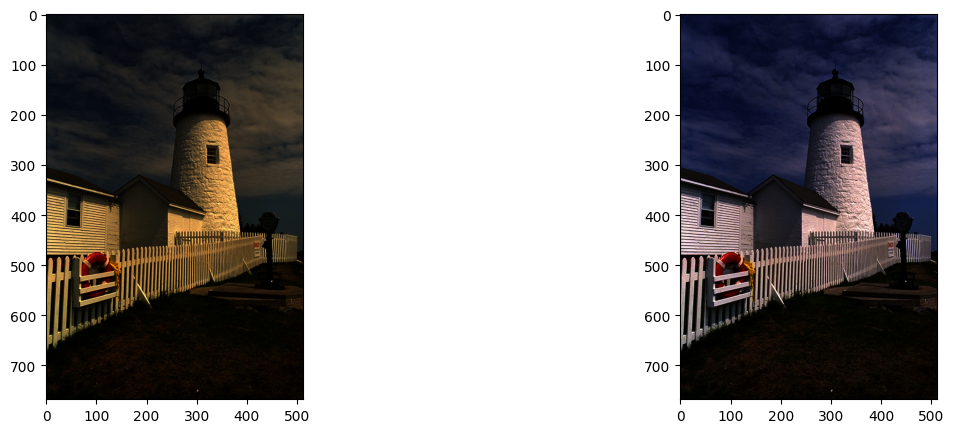

In [142]:
# Define white patch and the coefficients
row, col = 410, 350 # !!!! for dart.png
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced_white_patch = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced_white_patch[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced_white_patch = balanced_white_patch/255
balanced_white_patch[balanced_white_patch > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced_white_patch)

### Gray world
This algorithm assumes that a scene, on average, is gray.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


44.3605702718099 35.49789683024088 23.04613494873047


(<Axes: >, <matplotlib.image.AxesImage at 0x2968e2a10>)

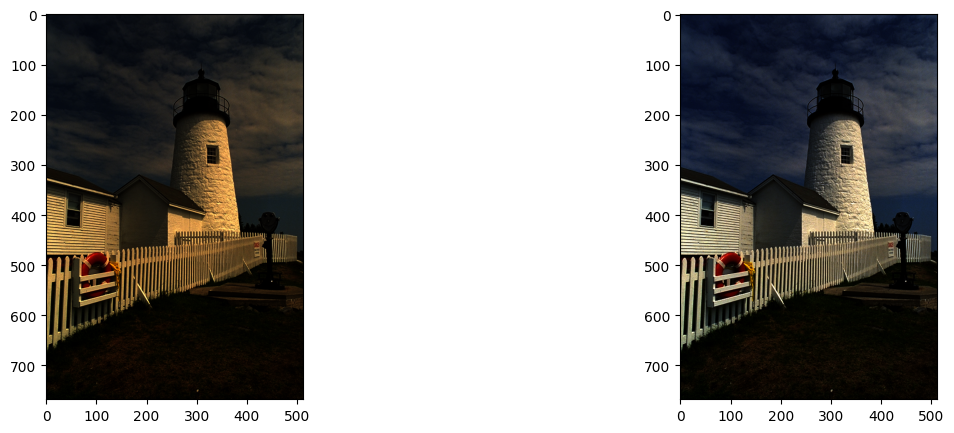

In [143]:
# Load your image
# img = cv2.imread('IMG_PATH')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])
print(mean_r, mean_g, mean_b)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

# add calculate max mean
max_mean = np.max([mean_r, mean_g, mean_b])

kr = max_mean / mean_r
kg = max_mean / mean_g
kb = max_mean / mean_b

# Apply color balancing and generate the balanced image
balanced_gray_world = np.stack([img[:, :, 0] * kr, img[:, :, 1] * kg, img[:, :, 2] * kb], axis=-1)
balanced_gray_world = balanced_gray_world/255
# print(balanced)


# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced_gray_world)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

255 255 255


(<Axes: >, <matplotlib.image.AxesImage at 0x2969c8290>)

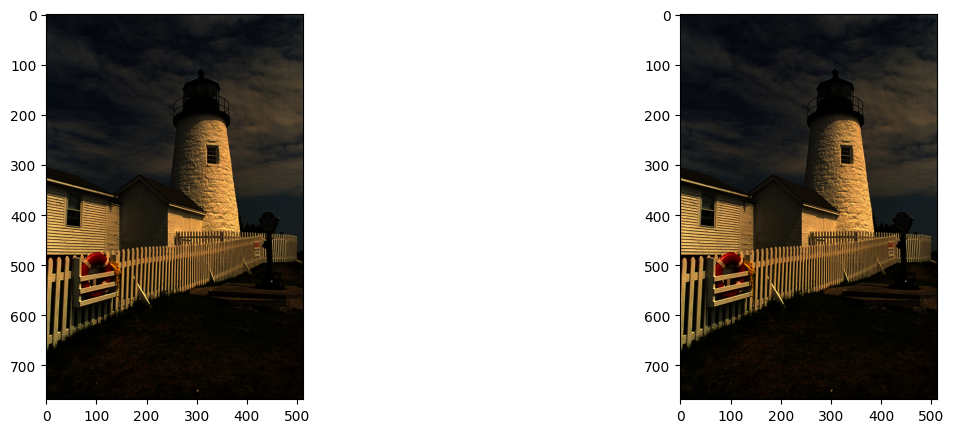

In [144]:
# Load your image
# img = cv2.imread('../data/dark.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])
print(max_r, max_g, max_b)

max_val = np.array([max_r, max_g, max_b])

# Apply scale-by-max balancing and generate the balanced image
######
## тут получается что у картинки есть у всех трех каналах макс занчение 255, поэтому деление на макс значение не дает никакого результата
## если взять sea.jpg то результат будет чуть виден, так как там по одному каналу макс значение ниже 255
######
balanced_scale_by_max = (img / max_val) * 255 
balanced_scale_by_max = balanced_scale_by_max/255

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced_scale_by_max)




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1023.5, 1535.5, -0.5)

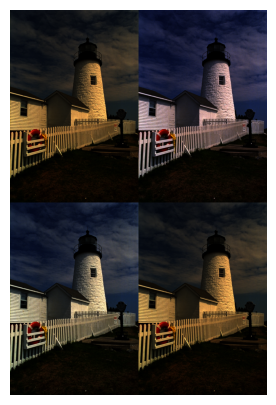

In [145]:
## result ##

out1 = np.hstack([img/255, balanced_white_patch])
out2 = np.hstack([balanced_gray_world, balanced_scale_by_max])
out = np.vstack([out1, out2])

plt.imshow(out)
plt.axis(False)